# Read in  / open csv file and model

In [2]:
#Import libraries
import pandas as pd
import pickle

#Read in csv file
df = pd.read_csv("telco_churn_encoded.csv")

#Open the best model's 
model_file_smote = open("telco_churn_best_model_gbc_smote.saved", "rb")
gbc_smote = pickle.load(model_file_smote)
model_file_smote.close()

model_file_under = open("telco_churn_best_model_gbc_under.saved", "rb")
gbc_under = pickle.load(model_file_under)
model_file_under.close()

In [3]:
#Prepare X and y
X = df.drop(columns='churn_value') #Explanatory variables
y = df['churn_value'] #Response variable

In [4]:
#Conduct Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [5]:
#Make predictions for each model
y_pred_smote = gbc_smote.predict(X_test)
y_pred_under = gbc_under.predict(X_test)

# Confusion Matrix

In [6]:
#Import libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

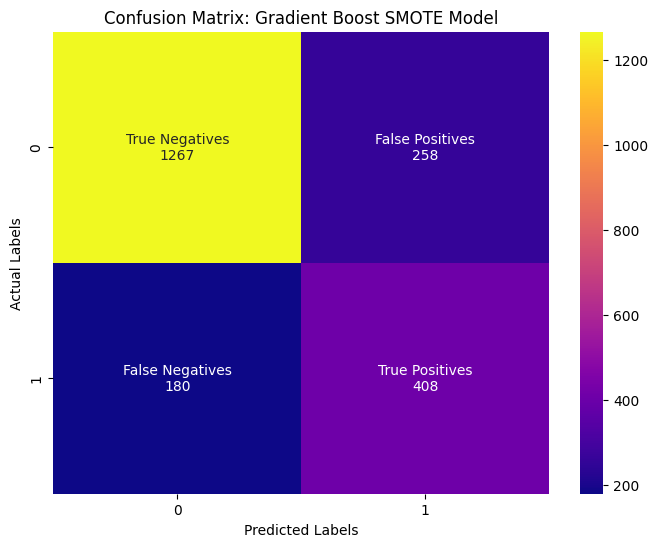

In [7]:
#Display confusion Matrix for smote model

#First initialize confusion matrix
cm = confusion_matrix(y_test, y_pred_smote)

#Extract values: trust postives, trust negatives, etc
tn, fp, fn, tp = cm.ravel()

#Create custom labels
labels = np.asarray([
    [f"True Negatives\n{tn}", f"False Positives\n{fp}"],
    [f"False Negatives\n{fn}", f"True Positives\n{tp}"]
])

#Annote and customize heatmap
plt.figure(figsize=(8,6)) #Set figure size
sns.heatmap(cm, annot=labels, fmt='', cmap='plasma')
plt.title('Confusion Matrix: Gradient Boost SMOTE Model')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

#Initialize class labels to further annotate graph
class_names = [0, 1]

#Initialize tick marks to line up class names appropriately
tick_marks = np.arange(len(class_names))

#Arrange the class labels (0 and 1)
plt.xticks(tick_marks + 0.5, class_names)
plt.yticks(tick_marks + 0.5, class_names, rotation=90) #Align Properly

#Display
plt.show()

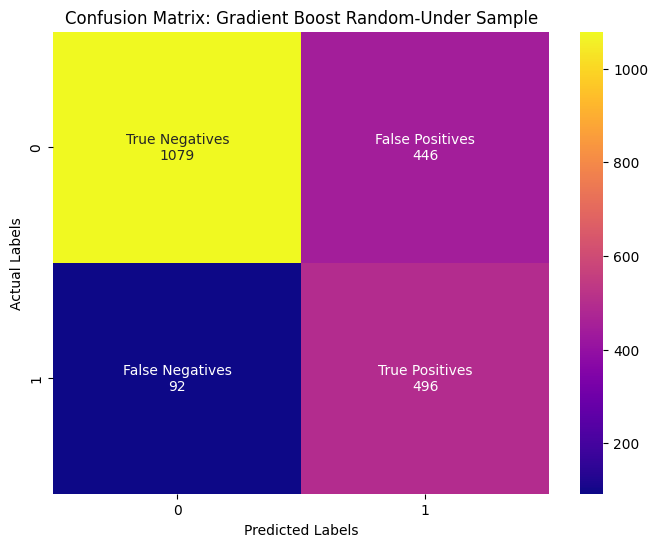

In [8]:
#Display confusion Matrix for random under-sampling model

#First initialize confusion matrix
cm = confusion_matrix(y_test, y_pred_under)

#Extract values: trust postives, trust negatives, etc
tn, fp, fn, tp = cm.ravel()

#Create custom labels
labels = np.asarray([
    [f"True Negatives\n{tn}", f"False Positives\n{fp}"],
    [f"False Negatives\n{fn}", f"True Positives\n{tp}"]
])

#Annote and customize heatmap
plt.figure(figsize=(8,6)) #Set figure size
sns.heatmap(cm, annot=labels, fmt='', cmap='plasma')
plt.title('Confusion Matrix: Gradient Boost Random-Under Sample')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

#Initialize class labels to further annotate graph
class_names = [0, 1]

#Initialize tick marks to line up class names appropriately
tick_marks = np.arange(len(class_names))

#Arrange the class labels (0 and 1)
plt.xticks(tick_marks + 0.5, class_names)
plt.yticks(tick_marks + 0.5, class_names, rotation=90) #Align Properly

#Display
plt.show()